# Program Introduction
This program use a package called mlxtend to explore various issues in Apriori Algorithm
It will utilize the three different data provided by instructor

## Package Installation

In [1]:
!pip install mlxtend --upgrade
import pandas as pd
import mlxtend
import copy
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpmax, fpgrowth

     |████████████████████████████████| 1.3 MB 9.7 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


#Vidhya (one transaction per line)

## Data Input. 


In [5]:
#Transaction file name
#data_file_name = '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Association_Analysis/Data/GroceryStoreStacked.dat.csv'
#data_file_name = '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Association_Analysis/Data/GroceryStoreStacked_sub.dat.csv'
#data_file_name = '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Association_Analysis/Data/house_votes_84.dat'
#data_file_name = '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Association_Analysis/Data/Assoc_Analysis_Vidhya.dat.csv'
#data_file_name = '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Association_Analysis/Data/groceries.csv'
data_file_name = '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Anomaly_Detection (Final DMP)/Market_Basket_Optimisation.csv'
if data_file_name == '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Association_Analysis/Data/GroceryStoreStacked.dat.csv' or data_file_name == '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Association_Analysis/Data/GroceryStoreStacked_sub.dat.csv':
  data_matrix = []
  with open(data_file_name, 'r') as data_file_ptr:
      prev = "1"
      temp = []
      for item in data_file_ptr:
        item = item.strip()
        item_list = item.split(',')
        if item_list[0] == prev:
          temp.append(item_list[1])
        else:
          if temp!= None:
            data_matrix.append(temp)
            print(temp)
          temp = []
          prev = item_list[0]
          temp.append(item_list[1])
      if temp != None:
        data_matrix.append(temp)
# other files
elif data_file_name == '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Association_Analysis/Data/Assoc_Analysis_Vidhya.dat.csv' or data_file_name == '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Association_Analysis/Data/groceries.csv' or data_file_name == '/content/drive/MyDrive/CSC373_DMP_Liu_Tongtong(Frank)/DMP_Anomaly_Detection (Final DMP)/Market_Basket_Optimisation.csv':
  data_matrix = []
  with open(data_file_name, 'r') as data_file_ptr:
      for index, item in enumerate(data_file_ptr):
        item = item.strip()
        item_list = item.split(',')
        item_list = item_list[1:]
        data_matrix.append(item_list)
        #print(item_list)
else:
  data_matrix = []
  with open(data_file_name, 'r') as data_file_ptr:
      label_list = []
      for index, item in enumerate(data_file_ptr):
        item = item.strip()
        item_list = item.split(',')
        if index == 0:
          label_list = copy.deepcopy(item_list)
        encoded_list = []
        if '?' not in item_list:
          encoded_list.append(item_list[0])
          for i in range(1, len(item_list)):
            if item_list[i] == 'y':
              encoded_list.append(label_list[i]) 
          data_matrix.append(encoded_list)
          print(encoded_list)
print(len(data_matrix))

7501


## Generate Association Rules from frequent itemset

Frequent Itemset

In [21]:
te = TransactionEncoder()
te_ary = te.fit(data_matrix).transform(data_matrix)
df = pd.DataFrame(te_ary, columns=te.columns_)
#frequent_itemsets = fpgrowth(df, min_support=0.2, use_colnames=True)  # use min support of 0,3
frequent_itemsets = apriori(df, min_support=0.025, use_colnames=True)
#frequent_itemsets = fpmax(df, min_support=0.6, use_colnames=True)

print(frequent_itemsets)


     support                      itemsets
0   0.025730                     (avocado)
1   0.030663                    (brownies)
2   0.067991                        (cake)
3   0.038262                   (champagne)
4   0.054126                     (chicken)
5   0.111718                   (chocolate)
6   0.044394                     (cookies)
7   0.048260                 (cooking oil)
8   0.029596              (cottage cheese)
9   0.142514                        (eggs)
10  0.060259                    (escalope)
11  0.138382                (french fries)
12  0.041195                 (fresh bread)
13  0.059059             (frozen smoothie)
14  0.045594           (frozen vegetables)
15  0.119184                   (green tea)
16  0.069191                 (ground beef)
17  0.043861                       (honey)
18  0.028663                    (hot dogs)
19  0.025730                  (light mayo)
20  0.070391              (low fat yogurt)
21  0.105453                        (milk)
22  0.16144

Association Rule

In [23]:
from mlxtend.frequent_patterns import association_rules

# can manipulate different metric (other than confidence and the min_threshold)
rules = association_rules(frequent_itemsets, metric="conviction", min_threshold = 1.1)
print(rules)

        antecedents      consequents  ...  leverage  conviction
0       (chocolate)           (eggs)  ...  0.009142    1.105497
1       (chocolate)           (milk)  ...  0.013282    1.153278
2            (milk)      (chocolate)  ...  0.013282    1.165225
3   (mineral water)      (chocolate)  ...  0.013959    1.107836
4       (chocolate)  (mineral water)  ...  0.013959    1.175099
5            (milk)           (eggs)  ...  0.010968    1.138039
6   (mineral water)           (eggs)  ...  0.017253    1.142371
7            (eggs)  (mineral water)  ...  0.017253    1.168729
8            (eggs)      (spaghetti)  ...  0.011642    1.103223
9       (spaghetti)           (eggs)  ...  0.011642    1.119789
10      (green tea)   (french fries)  ...  0.009637    1.103563
11  (mineral water)    (ground beef)  ...  0.018959    1.144376
12    (ground beef)  (mineral water)  ...  0.018959    1.485358
13    (ground beef)      (spaghetti)  ...  0.020281    1.505417
14      (spaghetti)    (ground beef)  ..

Confidence vs Lift in Vidhya data

[[1.         0.43128638]
 [0.43128638 1.        ]]


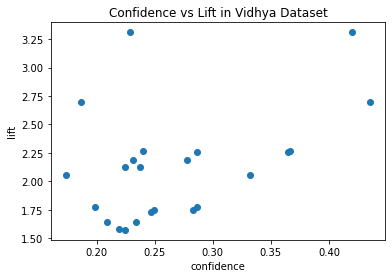

In [24]:
import matplotlib.pyplot as plt
import numpy as np
confidence = rules['confidence']
lift = rules['lift']
print(np.corrcoef(confidence,lift))
plt.scatter(confidence, lift)
plt.xlabel("confidence")
plt.ylabel("lift")
plt.title("Confidence vs Lift in Vidhya Dataset")
plt.show()

[[1.         0.93993722]
 [0.93993722 1.        ]]


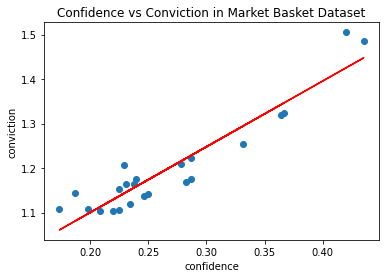

y=1.48x+0.81
Pearsons correlation: 0.940


In [40]:
confidence = rules['confidence']
conviction = rules['conviction']
print(np.corrcoef(confidence,conviction))


from scipy import stats
#regression part
slope, intercept, r_value, p_value, std_err = stats.linregress(confidence, conviction)
line = slope*confidence+intercept
plt.plot(confidence, line, 'r', label = 'y={:.2f}x+{:.2f}'.format(slope,intercept))
#end
plt.scatter(confidence, conviction)
plt.xlabel("confidence")
plt.ylabel("conviction")
plt.title("Confidence vs Conviction in Market Basket Dataset")
plt.show()
print('y={:.2f}x+{:.2f}'.format(slope,intercept))

corr, _ = stats.pearsonr(confidence, conviction)
print('Pearsons correlation: %.3f' % corr)

## Rule Generation and Selection Criteria


In [ ]:
# we want to further add some critera
# we count the antecedents length
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))
print(rules)

                       antecedents  ... antecedent_len
0                  (aid_Nicaragua)  ...              1
1                     (MX_missile)  ...              1
2                     (MX_missile)  ...              1
3                 (anti_satellite)  ...              1
4                     (MX_missile)  ...              1
..                             ...  ...            ...
347  (democrat, budget_resolution)  ...              2
348                (aid_Nicaragua)  ...              1
349                 (export_admin)  ...              1
350                     (democrat)  ...              1
351            (budget_resolution)  ...              1

[352 rows x 10 columns]


In [ ]:
# if we want len >= 2, confidence greater than 0.2
# obviously this should be empty since all antecedent_len are 1
rules_A = rules[(rules['consequents'] == {'democrat'})]
print(rules_A)

                                          antecedents  ... antecedent_len
6                                        (MX_missile)  ...              1
26                                    (aid_Nicaragua)  ...              1
33                                   (anti_satellite)  ...              1
37                                (budget_resolution)  ...              1
52                                     (export_admin)  ...              1
74                        (aid_Nicaragua, MX_missile)  ...              2
99                         (MX_missile, export_admin)  ...              2
183                (aid_Nicaragua, budget_resolution)  ...              2
194                     (aid_Nicaragua, export_admin)  ...              2
206                    (export_admin, anti_satellite)  ...              2
213                 (export_admin, budget_resolution)  ...              2
339  (aid_Nicaragua, export_admin, budget_resolution)  ...              3

[12 rows x 10 columns]


In [ ]:
# print out rules that contain meat as antecedents
rules_B = rules[rules['antecedents'] == {'Meat'}]
print(rules_B)

  antecedents consequents  ...  conviction  antecedent_len
0      (Meat)    (Cheese)  ...    2.006614               1
5      (Meat)      (Eggs)  ...    1.473495               1

[2 rows x 10 columns]


## Frequent Itemsets with Incomplete Antecedent and Consequent Information

In [ ]:
# if we have incomplete data in the data fram so some of the association rule table will contain Nan
dict = {'itemsets': [['177', '176'], ['177', '179'],
                     ['176', '178'], ['176', '179'],
                     ['93', '100'], ['177', '178'],
                     ['177', '176', '178']],
        'support':[0.253623, 0.253623, 0.217391,
                   0.217391, 0.181159, 0.108696, 0.108696]}

# we lack information for support of 1-itemset
freq_itemsets = pd.DataFrame(dict)
res = association_rules(freq_itemsets, support_only=True, min_threshold=0.1)
print(res)

   antecedents consequents  antecedent support  ...  lift  leverage  conviction
0        (176)       (177)                 NaN  ...   NaN       NaN         NaN
1        (177)       (176)                 NaN  ...   NaN       NaN         NaN
2        (179)       (177)                 NaN  ...   NaN       NaN         NaN
3        (177)       (179)                 NaN  ...   NaN       NaN         NaN
4        (176)       (178)                 NaN  ...   NaN       NaN         NaN
5        (178)       (176)                 NaN  ...   NaN       NaN         NaN
6        (176)       (179)                 NaN  ...   NaN       NaN         NaN
7        (179)       (176)                 NaN  ...   NaN       NaN         NaN
8        (100)        (93)                 NaN  ...   NaN       NaN         NaN
9         (93)       (100)                 NaN  ...   NaN       NaN         NaN
10       (178)       (177)                 NaN  ...   NaN       NaN         NaN
11       (177)       (178)              

In [ ]:
# You want to clean up the column unnecessary
res = res[['antecedents', 'consequents', 'support']]
print(res)

   antecedents consequents   support
0        (176)       (177)  0.253623
1        (177)       (176)  0.253623
2        (179)       (177)  0.253623
3        (177)       (179)  0.253623
4        (176)       (178)  0.217391
5        (178)       (176)  0.217391
6        (176)       (179)  0.217391
7        (179)       (176)  0.217391
8        (100)        (93)  0.181159
9         (93)       (100)  0.181159
10       (178)       (177)  0.108696
11       (177)       (178)  0.108696
12  (176, 178)       (177)  0.108696
13  (176, 177)       (178)  0.108696
14  (178, 177)       (176)  0.108696
15       (176)  (178, 177)  0.108696
16       (178)  (176, 177)  0.108696
17       (177)  (176, 178)  0.108696


## Pruning Association Rules


In [ ]:
print(rules)
# we have our rules as following

  antecedents consequents  ...  conviction  antecedent_len
0      (Meat)    (Cheese)  ...    2.006614               1
1    (Cheese)      (Meat)  ...    1.842746               1
2      (Eggs)    (Cheese)  ...    1.647309               1
3    (Cheese)      (Eggs)  ...    1.473923               1
4      (Eggs)      (Meat)  ...    1.557672               1
5      (Meat)      (Eggs)  ...    1.473495               1
6     (Bread)     (Bagel)  ...    1.401531               1
7     (Bagel)     (Bread)  ...    1.478419               1

[8 rows x 10 columns]


In [ ]:
# if we don't want the rule meat -> egg
# we define selection masks and remove the rule

antecedent_sele = rules['antecedents'] == frozenset({'Meat'})
consequent_sele = rules['consequents'] == frozenset({'Eggs'})
final_sele = (antecedent_sele & consequent_sele)
rules = rules.loc[~final_sele]
print(rules)

  antecedents consequents  ...  conviction  antecedent_len
0      (Meat)    (Cheese)  ...    2.006614               1
1    (Cheese)      (Meat)  ...    1.842746               1
2      (Eggs)    (Cheese)  ...    1.647309               1
3    (Cheese)      (Eggs)  ...    1.473923               1
4      (Eggs)      (Meat)  ...    1.557672               1
6     (Bread)     (Bagel)  ...    1.401531               1
7     (Bagel)     (Bread)  ...    1.478419               1

[7 rows x 10 columns]
